# Capstone - PGPDSE-FT.B.OCT19
Group Name: Group 3

Domain: Web and Social Media Analytics

Abstract: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). Online platforms like Medium, Buzzfeed and Mashable etc. publish hundreds of articles every day. These articles belong to certain categories like entertainment, technology, sports etc. and are posted on different days of the week. This project aims to predict the popularity of an online news article before it is published. Such a tool will help publishers and editors in maximizing the popularity of their articles and sell advertisement.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#

Original Research Paper: https://link.springer.com/chapter/10.1007/978-3-319-23485-4_53

Type of Problem : Classification. Given the features of an article, predict whether the article will be popular or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

# Ignoring Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
online_news=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
online_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
online_news.shape

(39644, 61)

In [5]:
online_news.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [6]:
# Remove duplicates
online_news=online_news.drop_duplicates()

In [7]:
# Find out all variables that contain missing values

online_news_na = online_news.isna().sum()
online_news_na[online_news_na.values > 0].sort_values(ascending=False) 

Series([], dtype: int64)

## No missing values and no duplicates

In [8]:
pp.ProfileReport(online_news)

Number of variables,61
Number of observations,39644
Total Missing (%),0.0%
Total size in memory,18.8 MiB
Average record size in memory,496.0 B
Numeric,43
Categorical,0
Boolean,14
Date,0
Text (Unique),1
Rejected,3


In [9]:
# Removing space character in the feature names

online_news.columns=online_news.columns.str.replace(' ','')

In [10]:
# n_tokens_content represents Number of words in the content
# However we see its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content

num_rows_nowords = online_news[online_news['n_tokens_content'] == 0 ].index
print("Number of news items with no words are : ",num_rows_nowords.size)

Number of news items with no words are :  1181


In [11]:
# Drop these items or rows with n_tokens_content = 0

#online_news = online_news.drop(num_rows_nowords , inplace=True)
online_news = online_news[online_news['n_tokens_content'] != 0]

In [12]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
online_news = online_news.drop('url',axis=1)
online_news = online_news.drop('timedelta',axis=1)
online_news = online_news.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [13]:
#Understanding target variable distribution

online_news.loc[:,"shares"].median()

1400.0

Hence, to set a threshold for deciding whether an article is popular, I choose the median number of shares in the dataset. All the articles with 1400 or more shares are marked as popular and all the articles with less than 1400 shares are considered to be unpopular

In [14]:
# Create a new target variable
online_news['popularity'] = online_news['shares'].apply(lambda x: 0 if x <1400 else 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2F00B8>]],
      dtype=object)

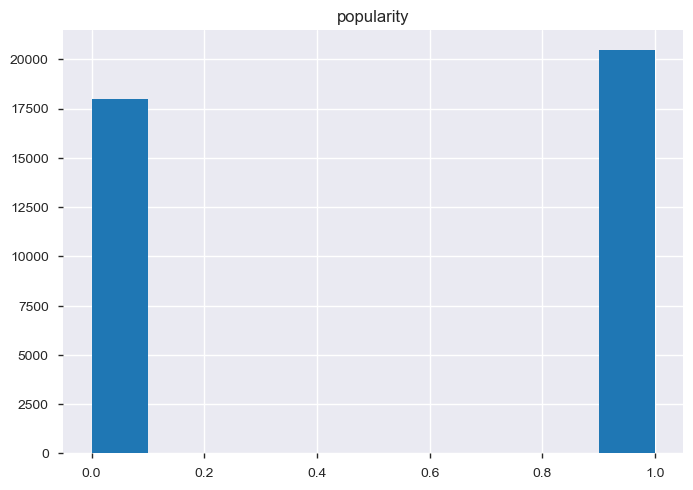

In [15]:
online_news.hist(column="popularity")

# Outlier calculation

In [16]:
num_cols = online_news.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = online_news[column].quantile(0.25)    # First Quartile
    q3 = online_news[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = online_news[(online_news[column] < llimit) | (online_news[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

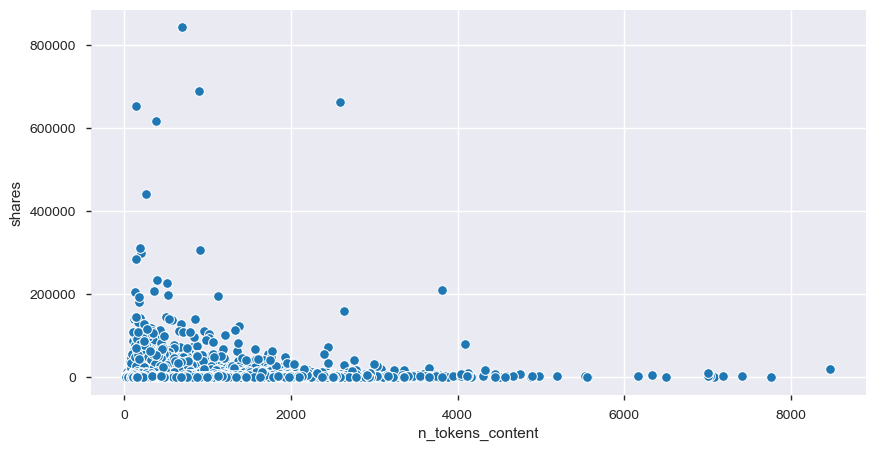

In [17]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=online_news,palette='muted');

In [18]:
online_news[['n_tokens_content','shares']].corr()

,n_tokens_content,shares
n_tokens_content,1.000000,0.006714
shares,0.006714,1.000000


We observe that people do not like to read longer news articles and hence would not share longer articles

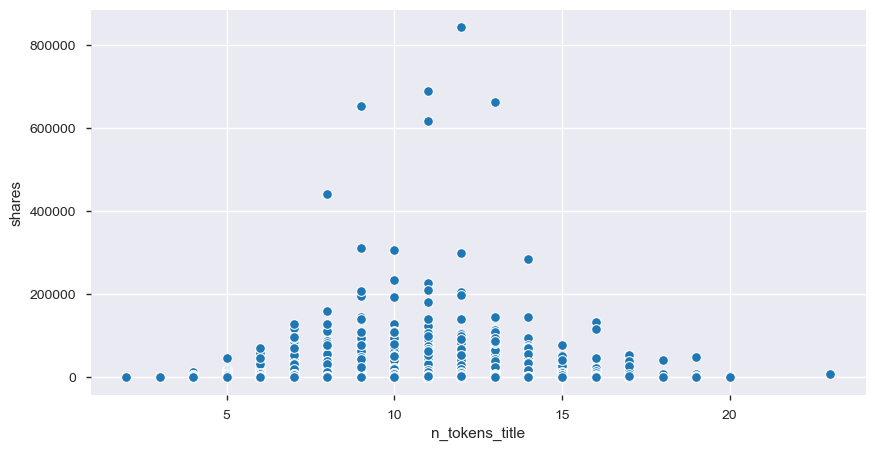

In [19]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=online_news,palette='muted');

In [20]:
online_news[['n_tokens_title','shares']].corr()

,n_tokens_title,shares
n_tokens_title,1.000000,0.006209
shares,0.006209,1.000000


Number of words in the title determine whether the reader would like to read more or not

# Insights and Recommendations


Increase:
-> Amount of key words.
-> Number of linked embedded.
-> Number of images.
-> Reference articles with high popularity.
-> A more subjective and positive title.

Time of publication:

-> Postpone non-time sensitive articles (features etc.) to the weekend. Weekend receive more shares than weekdays.

-> Focus more on social media articles during the weekdays.
      Monday	Social > Lifestyle/ Tech > Business > World/ Entertainment
      Tuesday	Social > Lifestyle/ Tech > Business > Entertainment > World
      Wednesday   	Social > Lifestyle/ Tech > Business > Entertainment > World
      Thursday	Social > Lifestyle/ Tech > Business > Entertainment > World
      Friday	Social > Lifestyle/ Tech > Business > World/ Entertainment
      Saturday	Lifestyle/ Business/ Social/ Tech > Entertainment > World
      Sunday	Lifestyle/ Business/ Social/ Tech > Entertainment > World

Channel:
-> Editors may want to put more emphasis on articles of a specific channel.
-> Social media> technology > lifestyle > business > entertainment > world

# Scaling of dataset

In [21]:
# df2_num  dataframe contains numerical feaures.

df2_num=online_news.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=online_news[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [22]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [23]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [24]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [25]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [26]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [27]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [28]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [29]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [30]:
#Treating outlier :  

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [31]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.035176598834579
9.255141443516148
1.5549912111703925
Number of outliers in "n_tokens_content" : 0
3.8606108316049057
7.4389873722450375
0.894594135160033
Number of outliers in "n_unique_tokens" : 521
-1.1447330871949666
-0.11457995707661778
0.2575382825295872
Number of outliers in "average_token_length" : 0
0.7213219248319653
0.7805063986513017
0.014796118454834084
Number of outliers in "num_keywords" : 0
0.08898023439465863
14.92754619076986
3.7096414890938005
Number of outliers in "num_hrefs_new" : 0
0.5491716421400927
3.4345005899992174
0.7213322369647812
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914570269453
2.8728195315766647
0.8756277471509025
Number of outliers in "num_imgs_new" : 0
-0.16197366078172049
1.8075267590527728
0.49237510495862336
Number of outliers in "num_videos_new" : 0
-0.6194220334933134
1.0323700558221889
0.41294802232887556
Number of outliers in "kw_min_min_new" : 0
-1.736830926874091
2.8947182114568184
1

We can see number of outliers have reduced significantly

In [32]:
# Combining numeric features and catogorical features.

online_news_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [33]:
online_news_final.shape

(39518, 56)

In [34]:
online_news_final.head(1)

,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,num_keywords,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,kw_min_min_new,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,6.922655,5.055379,-0.415905,0.751267,4.456167,1.479051,1.075131,0.576589,0.0,0.580315,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
# Create a new target variable and hence treated dataset
online_news_final['popularity'] = online_news['shares'].apply(lambda x: 0 if x <1400 else 1)

In [36]:
# Find out all variables that contain missing values

online_news_na = online_news_final.isna().sum()
online_news_na[online_news_na.values > 0].sort_values(ascending=False) 

popularity                          1055
global_rate_positive_words_new      1055
global_subjectivity_new             1055
LDA_04_new                          1055
LDA_03_new                          1055
LDA_02_new                          1055
LDA_01_new                          1055
LDA_00_new                          1055
self_reference_avg_sharess_new      1055
self_reference_max_shares_new       1055
self_reference_min_shares_new       1055
kw_avg_avg_new                      1055
kw_max_avg_new                      1055
kw_min_avg_new                      1055
kw_avg_max_new                      1055
kw_max_max_new                      1055
kw_min_max_new                      1055
kw_max_min_new                      1055
kw_min_min_new                      1055
num_videos_new                      1055
num_imgs_new                        1055
num_self_hrefs_new                  1055
num_hrefs_new                       1055
num_keywords                        1055
average_token_le

In [37]:
online_news_final = online_news_final.dropna()

In [38]:
online_news_final.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,num_keywords,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,kw_min_min_new,...,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,popularity
0,6.922655,5.055379,-0.415905,0.751267,4.456167,1.479051,1.075131,0.576589,0.0,0.580315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.367663,5.188877,-0.511726,0.760224,3.284093,1.288808,0.683750,0.576589,0.0,0.580315,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.367663,5.022662,-0.563786,0.738890,5.653442,1.288808,0.683750,0.576589,0.0,0.580315,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,5.367663,5.825490,-0.701974,0.739420,6.872091,2.041973,0.000000,0.576589,0.0,0.580315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.415730,6.424806,-0.904890,0.751367,6.872091,2.564834,2.825381,1.479758,0.0,0.580315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# ML - Classification - Base Model

In [39]:
modelscore=[]
X=online_news_final.drop('popularity',axis=1)
y=online_news_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
# Fitting KNN to the training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

knn_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + knn_score)

modelscore.append(['KNN',knn_score])

[[1604 1885]
 [1733 2260]]
Accuracy : 0.5164394546912591


In [41]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

logR_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + logR_score)

modelscore.append(['Logistic Regression',logR_score])

[[   0 3489]
 [   0 3993]]
Accuracy : 0.5336808340016038


In [42]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

NB_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + NB_score)

modelscore.append(['Naive Bayes',NB_score])

[[   0 3489]
 [   0 3993]]
Accuracy : 0.5336808340016038


In [43]:
#Fitting Random Forest to Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

RFC_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + RFC_score)

modelscore.append(['Random Forest',RFC_score])

[[2068 1421]
 [1882 2111]]
Accuracy : 0.5585404971932638


In [44]:
#Fitting Decision Tree to Training set

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

DT_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + DT_score)

modelscore.append(['Decision Tree',DT_score])

[[1788 1701]
 [1572 2421]]
Accuracy : 0.5625501202886929


In [45]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)

classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

ADABoost_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + ADABoost_score)

modelscore.append(['ADABoost',ADABoost_score])

[[1840 1649]
 [1168 2825]]
Accuracy : 0.6234963913392141


In [46]:
#Fitting Gradient Boosting to Training set
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

GB_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + GB_score)

modelscore.append(['Gradient Boosting',GB_score])

[[1842 1647]
 [1059 2934]]
Accuracy : 0.6383319967923016


In [47]:
scores = pd.DataFrame(modelscore, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,KNN,0.5164394546912591
1,Logistic Regression,0.5336808340016038
2,Naive Bayes,0.5336808340016038
3,Random Forest,0.5585404971932638
4,Decision Tree,0.5625501202886929
5,ADABoost,0.6234963913392141
6,Gradient Boosting,0.6383319967923016


## Above scores are with all base models and all selected features

Improvement - implement RFE (Random Feature Extraction)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 40)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False  True  True False False  True  True  True False  True  True  True
  True False  True  True False  True False False False False  True  True
  True  True  True  True False  True  True  True]
[ 1  1  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1 11 14  9  8
  7  1  1 15 17  1  1  1 12  1  1  1  1  5  1  1 10  1 16  3  2 13  1  1
  1  1  1  1  6  1  1  1]


In [49]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 40)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'kw_min_min_new',
       'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new',
       'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'popularity_new', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_so

In [50]:
online_news_final_rfe = online_news_final[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'kw_min_min_new',
       'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new',
       'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'popularity_new', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

In [51]:
modelscore_rfe=[]
X=online_news_final_rfe
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [52]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
knn_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['KNN_rfe',knn_rfe_score])

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
logR_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['Logistic Regression_rfe',logR_rfe_score])

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
NB_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['Naive Bayes_rfe',NB_rfe_score])

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
RFC_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['Random Forest_rfe',RFC_rfe_score])

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
DT_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['Decision Tree_rfe',DT_rfe_score])

classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ADABoost_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['ADABoost_rfe',ADABoost_rfe_score])

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
GB_rfe_score = str(accuracy_score(y_test, y_pred))
modelscore_rfe.append(['Gradient Boosting',GB_rfe_score])

In [53]:
scores = pd.DataFrame(modelscore_rfe, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,KNN_rfe,0.5155038759689923
1,Logistic Regression_rfe,0.5336808340016038
2,Naive Bayes_rfe,0.5336808340016038
4,Decision Tree_rfe,0.5558674151296444
3,Random Forest_rfe,0.5866078588612671
5,ADABoost_rfe,0.619620422346966
6,Gradient Boosting,0.6303127506014434


In [54]:
modelscore_RFE_allfeatures=[]

X=online_news_final.drop('popularity',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

from sklearn.ensemble import AdaBoostClassifier as ABC

rf_rfe=RandomForestClassifier()
rf_rfe.fit(X_train,y_train)

ypred4=rf_rfe.predict(X_test)

print("Train score: " ,rf_rfe.score(X_train, y_train)) #trainscore
rf_rfe_score = str(accuracy_score(y_test, ypred4))

print("Test Score: ", rf_rfe_score) #testscore

Train score:  0.9868627076570555
Test Score:  0.582286376191749


In [55]:
rfboost=ABC(base_estimator=rf_rfe,n_estimators=50)

In [56]:
for model, name in zip([rfboost],
                       ['rfboost_allFeatures']):
    
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_RFE_allfeatures.append([name,str(accuracy_score(y_test,ypredict))])

gb_rfe=GradientBoostingClassifier()
gb_rfe.fit(X_train,y_train)

gbboost=ABC(base_estimator=gb_rfe,n_estimators=50)

for model, name in zip([gbboost],
                       ['gbboost_allFeatures']):
    
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_RFE_allfeatures.append([name,str(accuracy_score(y_test,ypredict))])

In [57]:
scores = pd.DataFrame(modelscore_RFE_allfeatures, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,rfboost_allFeatures,0.5873652321126258
